In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
df = pd.read_csv("House Price India.csv")

In [209]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### pd.to_timedelta(42491, unit='D') => Timedelta('42491 days 00:00:00')
### '1899-12-30' + 42491 days = 2016-05-24


In [210]:
df['Date']=pd.to_datetime('1899-12-30') + pd.to_timedelta(df['Date'],unit='D')
df['sale_month'] = df['Date'].dt.month
df['sale_dayofweek'] = df['Date'].dt.dayofweek



In [211]:
df.drop(columns=['Date','id','living area','lot area'],axis=1,inplace=True)

In [212]:
df.head()

,number of bedrooms,number of bathrooms,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,sale_month,sale_dayofweek
0,4,2.50,1.5,0,0,5,8,1910,1010,1909,...,122004,52.8878,-114.470,2470,4000,2,51,1400000,5,6
1,5,2.75,1.5,0,0,3,8,2910,0,1939,...,122004,52.8852,-114.468,2940,6600,1,53,1200000,5,6
2,4,2.50,2.0,0,0,3,9,3310,0,2001,...,122005,52.9532,-114.321,3350,42847,3,76,838000,5,6
3,3,2.00,1.5,0,0,4,8,1880,830,1929,...,122006,52.9047,-114.485,2060,4500,1,51,805000,5,6
4,3,2.50,1.0,0,0,4,9,1700,900,1951,...,122007,52.9133,-114.590,2380,4750,1,67,790000,5,6


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14619 non-null  int64  
 1   number of bathrooms                    14619 non-null  float64
 2   number of floors                       14619 non-null  float64
 3   waterfront present                     14619 non-null  int64  
 4   number of views                        14619 non-null  int64  
 5   condition of the house                 14619 non-null  int64  
 6   grade of the house                     14619 non-null  int64  
 7   Area of the house(excluding basement)  14619 non-null  int64  
 8   Area of the basement                   14619 non-null  int64  
 9   Built Year                             14619 non-null  int64  
 10  Renovation Year                        14619 non-null  int64  
 11  Po

In [214]:
df.describe()

,number of bedrooms,number of bathrooms,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,sale_month,sale_dayofweek
count,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000
mean,3.379233,2.129557,1.502326,0.007661,0.232848,3.430399,7.682263,1801.676654,296.480197,1970.929817,...,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05,8.230248,3.826390
std,0.938655,0.769955,0.540241,0.087196,0.765651,0.664047,1.174917,833.737588,448.566731,29.491743,...,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05,2.204285,1.455581
min,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,...,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04,5.000000,0.000000
25%,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,...,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05,6.000000,3.000000
50%,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,...,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05,8.000000,4.000000
75%,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,...,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05,10.000000,5.000000
max,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,...,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06,12.000000,6.000000


In [215]:
df.corr()

,number of bedrooms,number of bathrooms,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,sale_month,sale_dayofweek
number of bedrooms,1.000000,0.509783,0.177208,-0.006247,0.078157,0.026326,0.352795,0.473482,0.300367,0.153184,...,-0.043978,-0.013226,0.135859,0.389765,0.029436,0.003399,-0.006066,0.308165,-0.014002,0.004731
number of bathrooms,0.509783,1.000000,0.502912,0.060107,0.183780,-0.128335,0.663082,0.684418,0.287194,0.498235,...,-0.105504,0.031139,0.223950,0.570524,0.078637,0.002181,0.009232,0.532031,-0.026133,0.006352
number of floors,0.177208,0.502912,1.000000,0.016322,0.019860,-0.270136,0.463033,0.525604,-0.242980,0.481733,...,-0.129704,0.050700,0.127627,0.285037,-0.010103,-0.007579,0.016617,0.262649,-0.009813,-0.008925
waterfront present,-0.006247,0.060107,0.016322,1.000000,0.400567,0.018662,0.079853,0.071885,0.085441,-0.024238,...,0.038311,-0.021792,-0.047799,0.085755,0.032053,0.001563,0.001443,0.263943,0.009685,-0.012696
number of views,0.078157,0.183780,0.019860,0.400567,1.000000,0.051791,0.254112,0.162193,0.293317,-0.054839,...,0.039834,-0.004734,-0.079411,0.281270,0.072455,0.008015,-0.001397,0.394954,-0.006638,0.010187
condition of the house,0.026326,-0.128335,-0.270136,0.018662,0.051791,1.000000,-0.152898,-0.168052,0.180650,-0.381554,...,0.045601,-0.003083,-0.121042,-0.099974,-0.004704,-0.006938,-0.002011,0.040609,-0.026392,0.007173
grade of the house,0.352795,0.663082,0.463033,0.079853,0.254112,-0.152898,1.000000,0.758161,0.167187,0.440689,...,-0.146161,0.115202,0.203935,0.719983,0.116779,0.000988,0.005046,0.671805,-0.032899,0.005063
Area of the house(excluding basement),0.473482,0.684418,0.525604,0.071885,0.162193,-0.168052,0.758161,1.000000,-0.046446,0.419679,...,-0.083545,-0.000155,0.346094,0.737710,0.194730,-0.002892,0.001322,0.615179,-0.016194,0.007423
Area of the basement,0.300367,0.287194,-0.242980,0.085441,0.293317,0.180650,0.167187,-0.046446,1.000000,-0.138861,...,-0.010547,0.112992,-0.145888,0.196417,0.011283,0.010284,0.002924,0.330499,-0.014314,-0.000750
Built Year,0.153184,0.498235,0.481733,-0.024238,-0.054839,-0.381554,0.440689,0.419679,-0.138861,1.000000,...,-0.062543,-0.143108,0.414523,0.328824,0.072849,-0.001633,-0.004059,0.050936,-0.004740,0.010023


In [216]:
df.isnull().sum()

number of bedrooms                       0
number of bathrooms                      0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
sale_month                               0
sale_dayofweek                           0
dtype: int64

In [217]:
df['new_price'] = df['Price']


In [218]:
df.drop(columns=['Price'],index=1,inplace=True)

In [219]:
df.head()

,number of bedrooms,number of bathrooms,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,sale_month,sale_dayofweek,new_price
0,4,2.50,1.5,0,0,5,8,1910,1010,1909,...,122004,52.8878,-114.470,2470,4000,2,51,5,6,1400000
2,4,2.50,2.0,0,0,3,9,3310,0,2001,...,122005,52.9532,-114.321,3350,42847,3,76,5,6,838000
3,3,2.00,1.5,0,0,4,8,1880,830,1929,...,122006,52.9047,-114.485,2060,4500,1,51,5,6,805000
4,3,2.50,1.0,0,0,4,9,1700,900,1951,...,122007,52.9133,-114.590,2380,4750,1,67,5,6,790000
5,5,3.25,2.0,0,2,3,10,3660,0,2006,...,122008,52.7637,-114.050,3320,11241,3,72,5,6,785000


In [220]:
X = df.iloc[:,:-1]

In [221]:
X.head()

,number of bedrooms,number of bathrooms,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,sale_month,sale_dayofweek
0,4,2.50,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,5,6
2,4,2.50,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,5,6
3,3,2.00,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,5,6
4,3,2.50,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,5,6
5,5,3.25,2.0,0,2,3,10,3660,0,2006,0,122008,52.7637,-114.050,3320,11241,3,72,5,6


In [222]:
y = df['new_price']

In [223]:
y.head()

0    1400000
2     838000
3     805000
4     790000
5     785000
Name: new_price, dtype: int64

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [225]:
X_train.shape

(11694, 20)

In [226]:
X_train.corr()

,number of bedrooms,number of bathrooms,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,sale_month,sale_dayofweek
number of bedrooms,1.000000,0.507606,0.175467,-0.004154,0.073491,0.031296,0.346840,0.468049,0.298583,0.157765,0.014183,-0.040137,-0.011644,0.135620,0.377832,0.026868,-0.000500,-0.007298,-0.016294,0.009020
number of bathrooms,0.507606,1.000000,0.499732,0.068806,0.182154,-0.120065,0.663031,0.689087,0.293318,0.496336,0.052806,-0.094857,0.027625,0.221800,0.566189,0.074635,-0.001032,0.004943,-0.028328,0.012491
number of floors,0.175467,0.499732,1.000000,0.022601,0.016729,-0.268088,0.461451,0.526413,-0.243414,0.482400,0.009123,-0.121864,0.049456,0.128505,0.281502,-0.015946,-0.015526,0.009294,-0.007724,-0.006400
waterfront present,-0.004154,0.068806,0.022601,1.000000,0.405797,0.009667,0.090718,0.082279,0.088679,-0.022422,0.095163,0.035019,-0.021166,-0.041530,0.094984,0.027469,0.005974,0.002690,0.007865,-0.012699
number of views,0.073491,0.182154,0.016729,0.405797,1.000000,0.063860,0.251276,0.164505,0.282383,-0.059017,0.102196,0.044733,-0.010501,-0.073511,0.281889,0.076184,0.012862,-0.000210,-0.010312,0.015218
condition of the house,0.031296,-0.120065,-0.268088,0.009667,0.063860,1.000000,-0.144097,-0.164285,0.181532,-0.376758,-0.064311,0.037842,0.001347,-0.115457,-0.090078,-0.006523,-0.003689,-0.002386,-0.028658,0.007459
grade of the house,0.346840,0.663031,0.461451,0.090718,0.251276,-0.144097,1.000000,0.756632,0.172899,0.437746,0.016666,-0.136166,0.113480,0.202998,0.715571,0.113040,-0.003080,-0.000231,-0.035302,0.011162
Area of the house(excluding basement),0.468049,0.689087,0.526413,0.082279,0.164505,-0.164285,0.756632,1.000000,-0.040072,0.421333,0.028171,-0.072213,-0.001452,0.345346,0.729823,0.191900,-0.005979,-0.005342,-0.014497,0.013874
Area of the basement,0.298583,0.293318,-0.243414,0.088679,0.282383,0.181532,0.172899,-0.040072,1.000000,-0.137096,0.076601,-0.014279,0.114457,-0.142615,0.201112,0.008273,0.013148,0.006752,-0.019100,0.000487
Built Year,0.157765,0.496336,0.482400,-0.022422,-0.059017,-0.376758,0.437746,0.421333,-0.137096,1.000000,-0.235883,-0.052548,-0.149349,0.419107,0.324343,0.072769,-0.006639,-0.005595,-0.001078,0.013371


<Axes: >

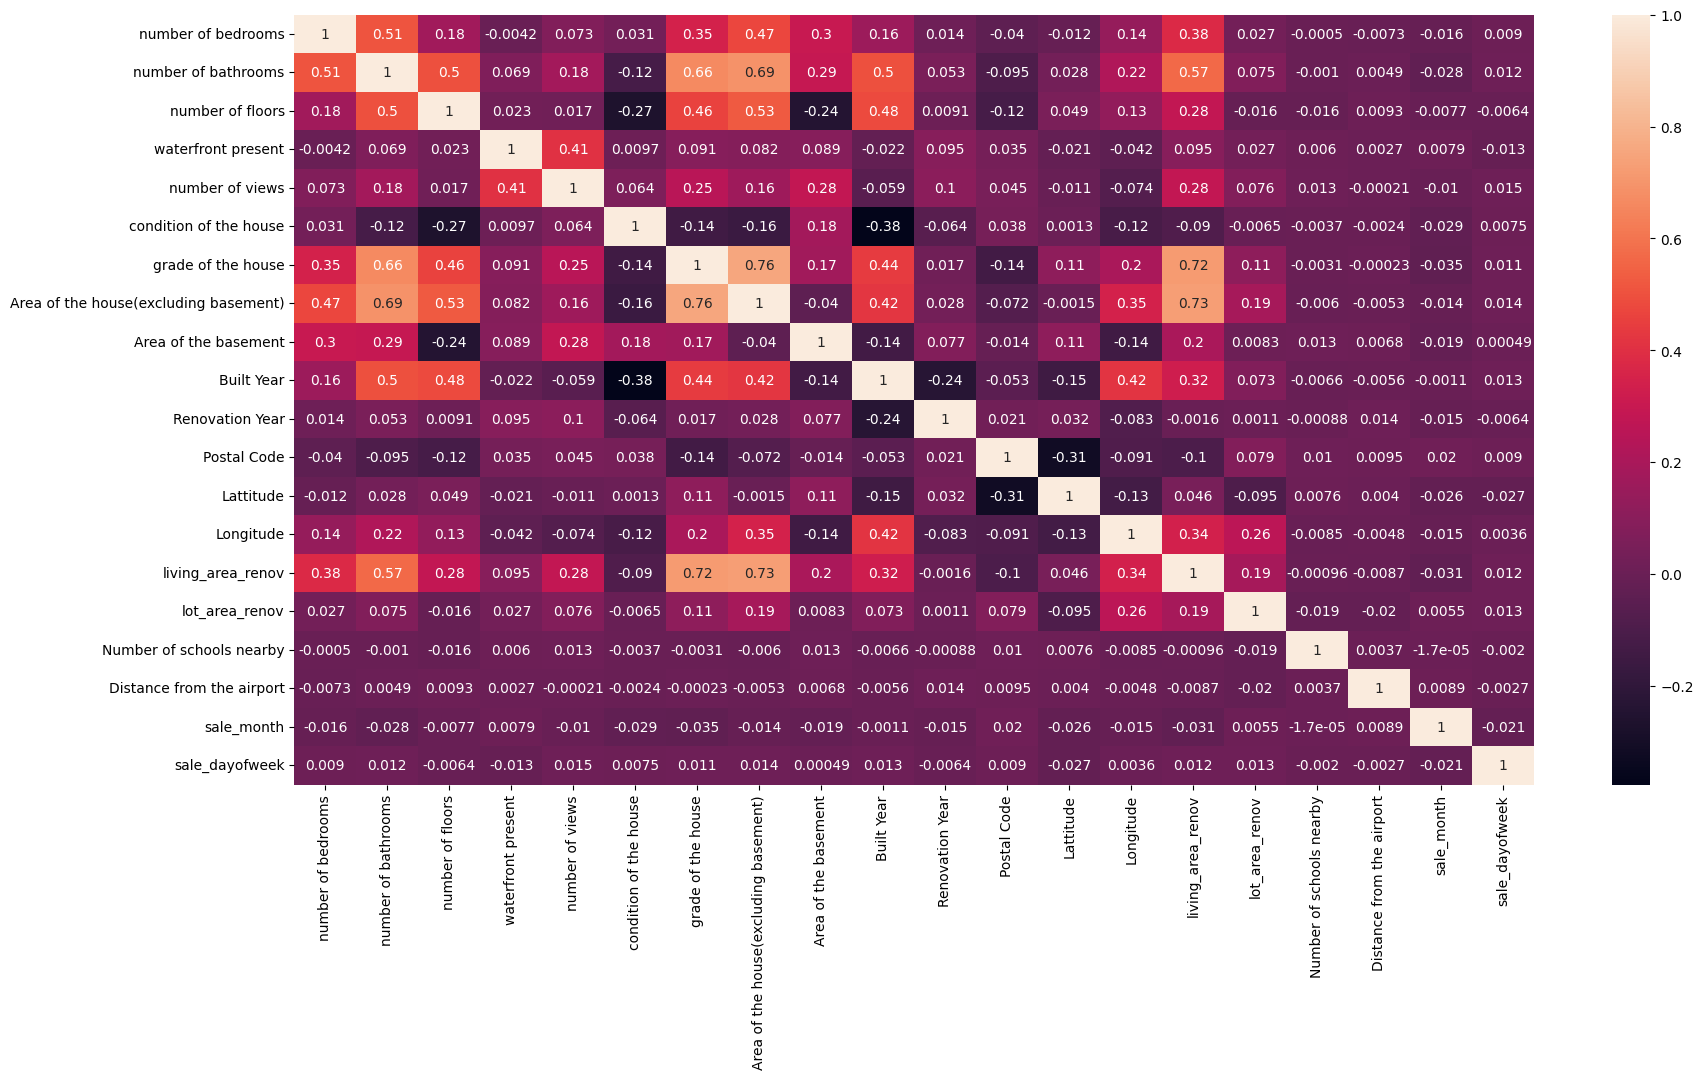

In [227]:
plt.figure(figsize=(20,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


<Axes: >

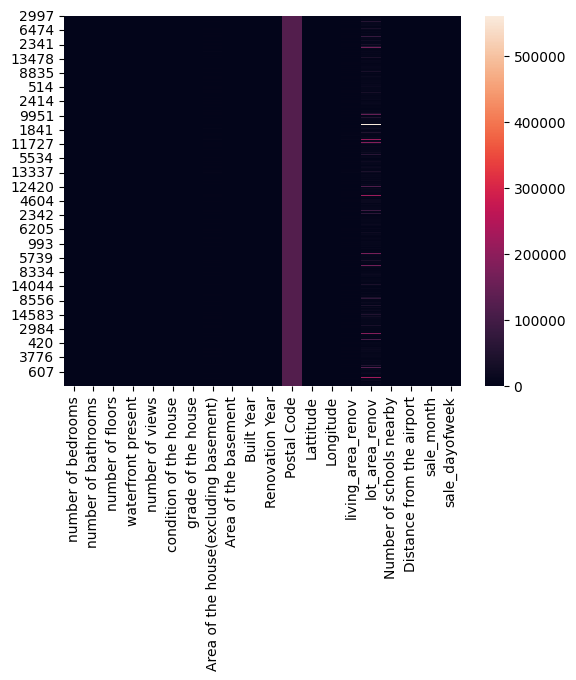

In [228]:
sns.heatmap(X_train)

Text(0.5, 1.0, 'X_train Before Scaling')

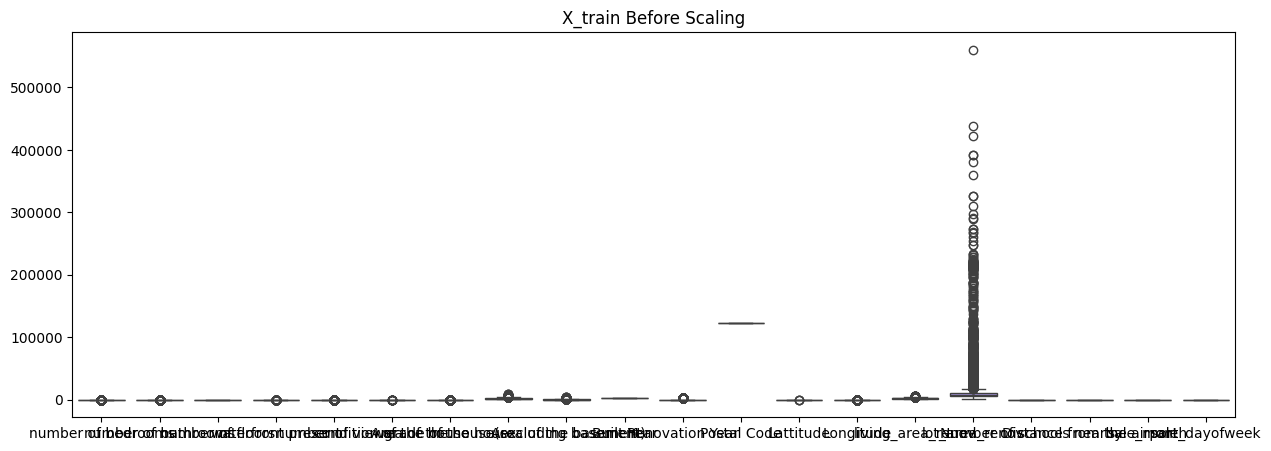

In [229]:
plt.subplots(figsize=(15, 5))
plt.plot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')


In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train after Scaling')

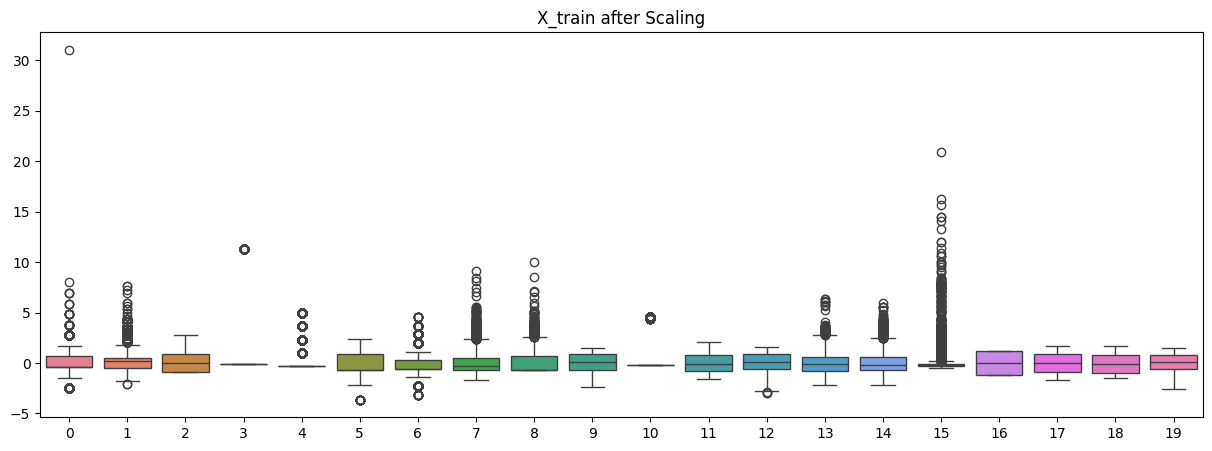

In [231]:
plt.subplots(figsize=(15, 5))
plt.plot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train after Scaling')


## Linear Regression Model

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linear = LinearRegression()

In [233]:
linear.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [234]:
y_pred=linear.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 121811.59529220805
R2 Score 0.7101230197699739


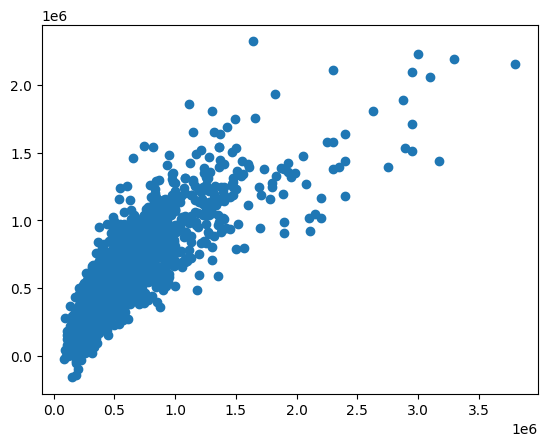

In [235]:

plt.scatter(y_test,y_pred)

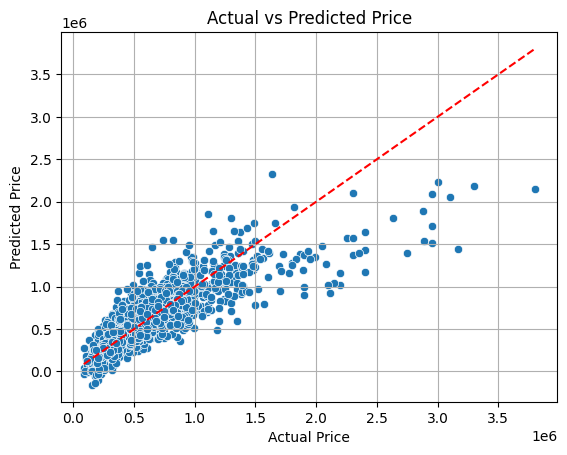

In [236]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference 45° line
plt.grid(True)
plt.show()


## Lasso regression

Mean absolute error 121810.8281879068
R2 Score 0.7101239170153297


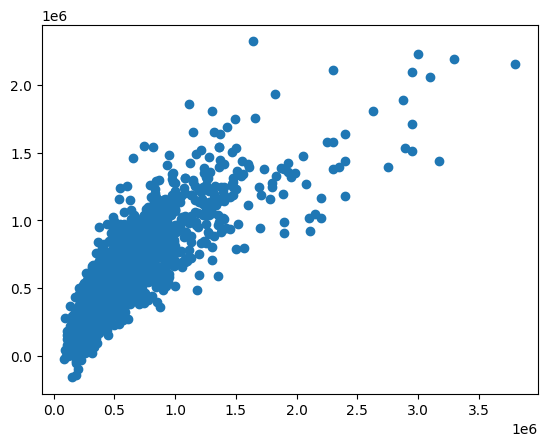

In [237]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [238]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


Mean absolute error 121089.11375085425
R2 Score 0.7108481643254754


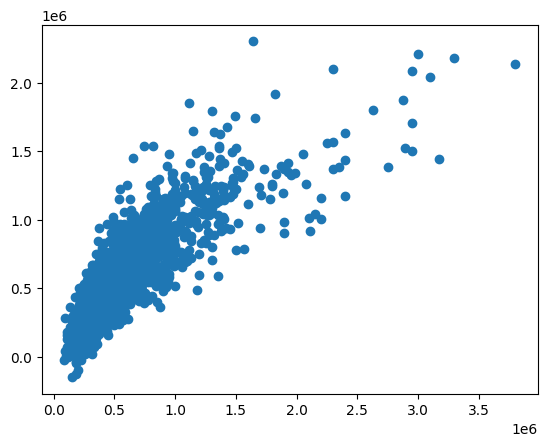

In [239]:
y_pred=lassocv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge 

Mean absolute error 121806.20839824801
R2 Score 0.7101320827421864


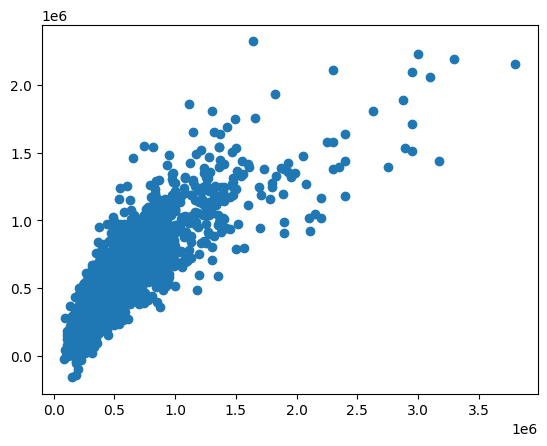

In [240]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 121758.0303418465
R2 Score 0.7102126052389688


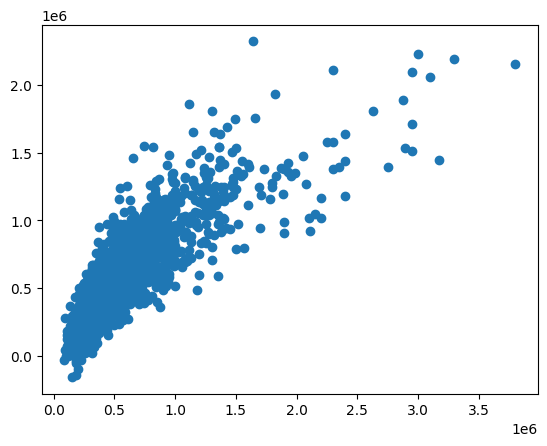

In [241]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Elasticnet Regression

Mean absolute error 119101.19793663807
R2 Score 0.6863496744785517


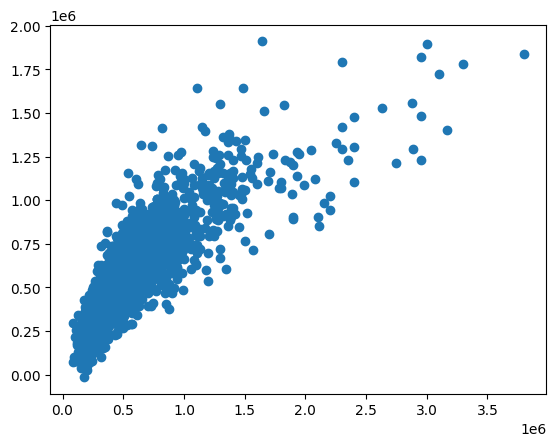

In [244]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [248]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))